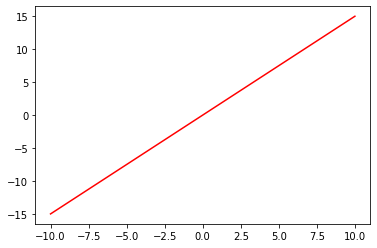

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
x = np.linspace(-10, 10)
y = 0 + 1.5 * x
plt.plot(x,y, 'r')
plt.show()

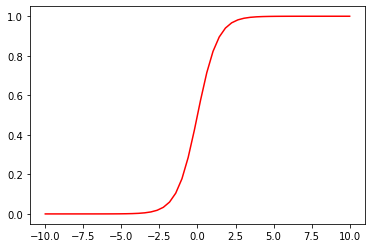

In [2]:
def function(data):
    return 1/(1 + math.e**(-1.5*data))
yl = function(x)
plt.plot(x,yl,'r')
plt.show()

In [15]:
df = pd.read_csv("../Data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [17]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

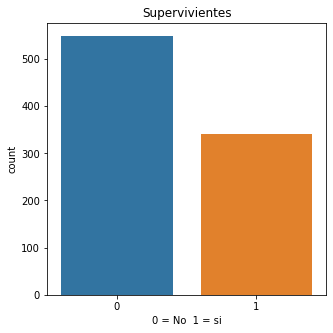

In [18]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data=df)
plt.title('Supervivientes')
plt.xlabel('0 = No  1 = si')
plt.show()

In [19]:
supervivientes = np.sum(df.Survived)
print(supervivientes)

342


In [20]:
no_supervivientes = df.shape[0] - np.sum(df.Survived)
print(no_supervivientes)

549


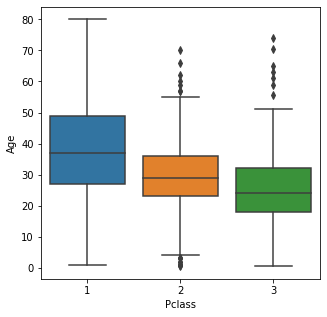

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

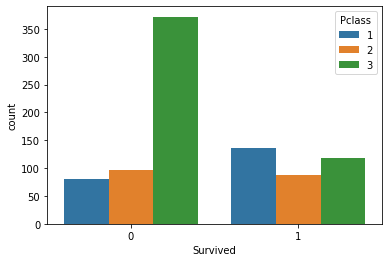

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

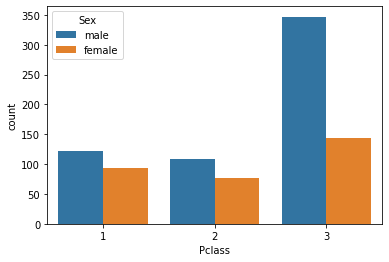

In [23]:
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.show()

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df = df.drop(['PassengerId','Name','Cabin','Ticket','Age'], axis=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [26]:
genders = {'male': 0,'female':1}
data = [df]

for dataset in data:
    dataset['Sex'] =  dataset['Sex'].map(genders)

df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [27]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
df.Embarked.isnull().sum()

2

In [29]:
common_value = 'S'
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
df.Embarked.isnull().sum()

0

In [30]:
ports = {'S':0, 'C':1, 'Q':2}

for dataset in data:
    dataset['Embarked'] =  dataset['Embarked'].map(ports)
df.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [31]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 10, 'Fare' ] = 0
    dataset.loc[(dataset['Fare'] > 10 ) & (dataset['Fare'] <= 20), 'Fare' ] = 1
    dataset.loc[(dataset['Fare'] > 20 ) & (dataset['Fare'] <= 30), 'Fare' ] = 2
    dataset.loc[(dataset['Fare'] > 30 ) & (dataset['Fare'] <= 100), 'Fare' ] = 3
    dataset.loc[(dataset['Fare'] > 100 ) & (dataset['Fare'] <= 250), 'Fare' ] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare' ] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)





In [32]:
df.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0
5,0,3,0,0,0,0,2
6,0,1,0,0,0,3,0
7,0,3,0,3,1,2,0
8,1,3,1,0,2,1,0
9,1,2,1,1,0,3,1


In [33]:
x_data = df.drop('Survived', axis=1)
y_survived = df.Survived

In [34]:
x_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size=0.3,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()
# ESTAMOS ENTRENANDO EL MODELO
log_model.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_predict = log_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[131,  26],
       [ 32,  79]], dtype=int64)

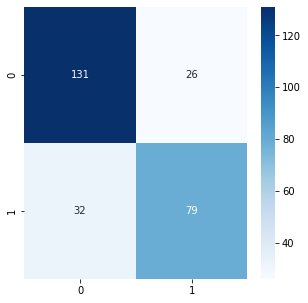

In [40]:
# MATRIZ DE CONFUSION
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True,fmt='g', cmap='Blues')
plt.show()

In [41]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [42]:
df.to_csv("../Data/train_clean.csv", header= True)